In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape
#(count of images, length, width, no of channels)

(50000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# to convert the shape of y from 2d array to single array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

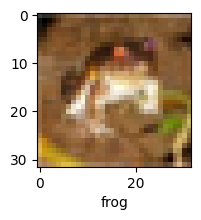

In [ ]:
plot_sample(x_train, y_train, 5)

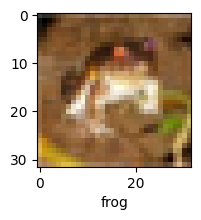

In [ ]:
plot_sample(x_train, y_train, 0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
ann = models.Sequential()
# input layer
ann.add(layers.Flatten(input_shape=(32,32,3)))
ann.add(layers.Dense(300, activation='relu'))
ann.add(layers.Dense(100, activation='relu'))
# output layer
ann.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,010 (3.64 MB)

 Trainable params: 953,010 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#model complilation
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Epoch means one complete pass through the entire training dataset by the learning algorithm.
#train model
hist = ann.fit(x_train, y_train, epochs=20, validation_split=0.4)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5823 - loss: 1.1675 - val_accuracy: 0.5165 - val_loss: 1.3961
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5874 - loss: 1.1639 - val_accuracy: 0.5140 - val_loss: 1.3925
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5887 - loss: 1.1550 - val_accuracy: 0.5097 - val_loss: 1.4165
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5875 - loss: 1.1381 - val_accuracy: 0.4882 - val_loss: 1.4624
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5919 - loss: 1.1397 - val_accuracy: 0.5067 - val_loss: 1.4154
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5991 - loss: 1.1213 - val_accuracy: 0.5091 - val_loss: 1.4219
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6005 - loss: 1.1168 - val_accuracy: 0.5171 - val_loss: 1.3990
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6022 - loss: 1.1109 - 

In [ ]:
y_prob = ann.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.7797988e-02, 2.2342250e-02, 2.7238572e-01, ..., 4.4268719e-03,
        2.0552086e-02, 2.7855940e-03],
       [4.2925175e-02, 2.0609374e-01, 4.7183288e-03, ..., 1.2423740e-03,
        4.5654702e-01, 2.8701070e-01],
       [5.7700908e-01, 4.1647732e-02, 2.0369282e-02, ..., 5.0247316e-03,
        3.1202480e-01, 3.8212657e-02],
       ...,
       [1.3229387e-03, 5.8244423e-05, 2.3396868e-01, ..., 3.4055233e-02,
        2.9039284e-02, 3.6589376e-04],
       [1.6291773e-02, 2.2691037e-03, 5.6455128e-02, ..., 9.3799941e-03,
        1.1969550e-03, 5.0515303e-04],
       [2.3623498e-02, 6.8386819e-04, 1.2618133e-01, ..., 4.0748593e-01,
        2.0632250e-03, 1.1322945e-03]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([4, 8, 0, ..., 5, 4, 7])

In [ ]:
for i in y_pred:
  print(i)

4
8
0
4
4
6
1
6
2
1
0
9
3
7
1
8
7
3
8
5
7
2
0
9
4
2
4
0
9
6
6
4
4
2
9
1
7
9
9
5
4
6
3
3
0
0
5
8
7
4
9
8
6
3
8
8
5
8
3
4
7
3
6
3
6
2
8
2
3
9
4
6
8
8
0
4
9
3
3
8
0
1
1
2
2
9
2
0
8
9
0
4
8
6
4
5
4
0
2
7
4
7
6
3
1
1
8
6
3
7
4
2
2
2
9
3
0
4
2
5
8
4
8
5
0
2
8
5
3
0
4
1
8
9
1
2
9
7
2
8
3
5
3
5
9
0
6
5
7
3
0
9
0
8
0
5
2
8
5
4
0
7
5
4
7
0
8
4
7
7
9
7
0
8
1
9
5
7
5
9
0
7
6
4
7
8
6
2
7
8
5
4
3
7
7
4
8
0
3
8
5
8
0
0
1
5
0
5
7
8
5
1
0
7
8
0
0
9
0
7
7
3
8
3
7
9
3
2
3
5
5
9
7
1
8
0
4
2
3
5
1
9
2
9
0
3
7
0
5
0
2
3
5
9
2
0
3
0
8
9
5
8
3
3
0
8
8
4
7
0
4
3
6
2
8
5
0
2
7
7
9
5
7
1
8
9
0
8
7
9
1
2
4
8
7
4
4
0
0
4
7
2
2
2
4
8
7
2
1
4
8
6
0
0
7
0
2
7
5
3
5
5
6
4
5
9
4
3
0
3
8
9
6
6
2
9
3
8
0
7
4
5
0
7
8
3
7
3
8
9
9
1
9
2
4
3
3
7
1
0
9
5
8
0
9
7
1
9
0
7
7
7
9
2
2
7
8
4
8
6
4
9
0
7
2
0
7
6
2
5
1
0
6
7
2
6
2
3
7
9
9
1
7
0
8
4
0
1
8
2
8
0
2
6
8
9
3
1
0
7
1
7
8
0
4
9
5
4
3
6
2
5
5
3
7
2
3
4
3
0
6
4
9
9
5
7
4
0
2
2
4
9
7
4
9
5
6
4
3
8
3
2
1
5
2
4
7
3
3
8
4
3
8
4
3
7
4
0
2
4
9
6
8
4
5
8
9
3
3
0
1
7
8
1
8
8
6
2
2
0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.515

In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5876 - loss: 1.1868
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.5875 - loss: 1.1722
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5958 - loss: 1.1543
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5972 - loss: 1.1448
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5933 - loss: 1.1460


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.61      0.58      1000
           1       0.65      0.61      0.63      1000
           2       0.42      0.40      0.41      1000
           3       0.39      0.27      0.32      1000
           4       0.43      0.51      0.47      1000
           5       0.42      0.46      0.44      1000
           6       0.68      0.47      0.56      1000
           7       0.53      0.65      0.59      1000
           8       0.60      0.68      0.64      1000
           9       0.58      0.57      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [ ]:
import seaborn as sns

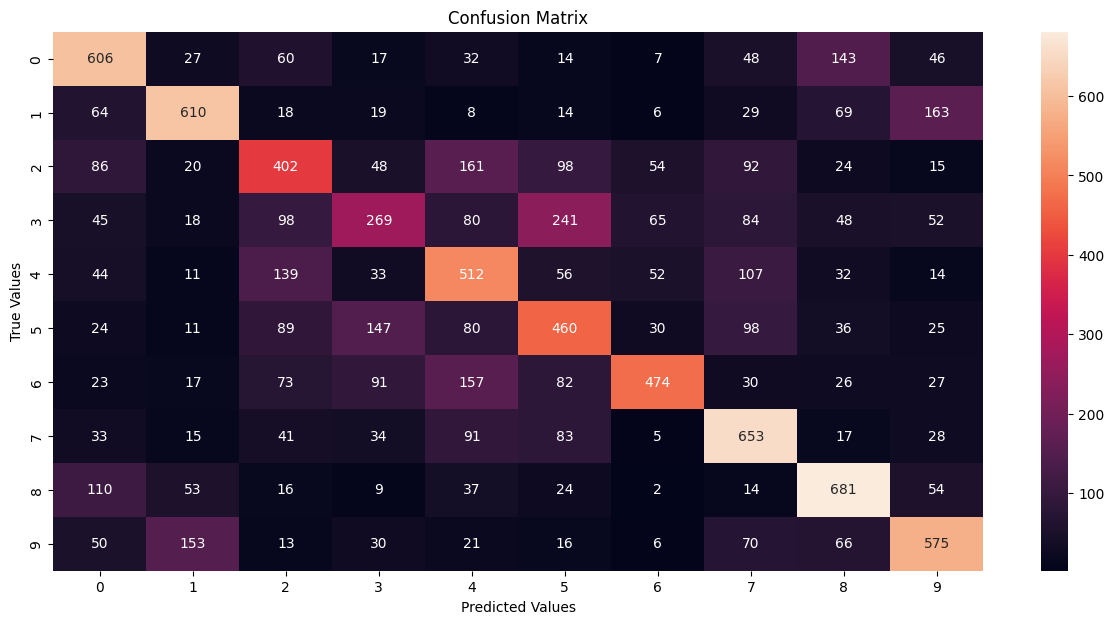

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True,fmt='d')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

# CNN

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # CNN Layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # ANN
    layers.Flatten(),
    # Hidden Layers
    layers.Dense(64, activation='relu'),
    # Output Layers
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0996 - loss: 2.3027
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.0960 - loss: 2.3028
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.0952 - loss: 2.3028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.0984 - loss: 2.3027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.1004 - loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.0980 - loss: 2.3028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0971 - loss: 2.3028
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.0973 - loss: 2.3027
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.0981 - loss: 2.3028


In [ ]:
cnn.evaluate(x_test,y_test)